In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('new_train.csv')

In [2]:
df.isna().sum()

comment_text     5
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [3]:
df = df.dropna()

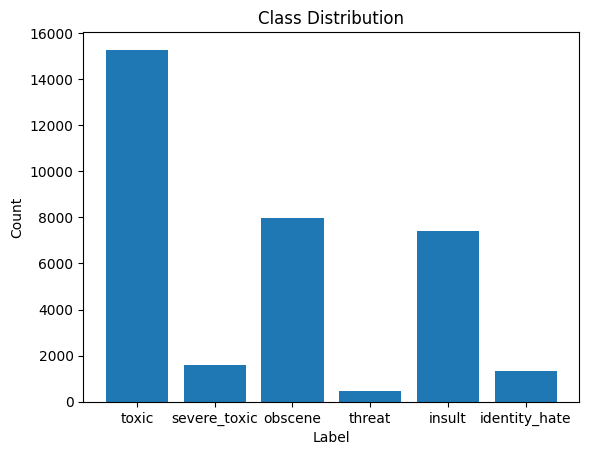

In [8]:
import matplotlib.pyplot as plt
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = df[labels].sum()
plt.bar(labels, label_counts)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

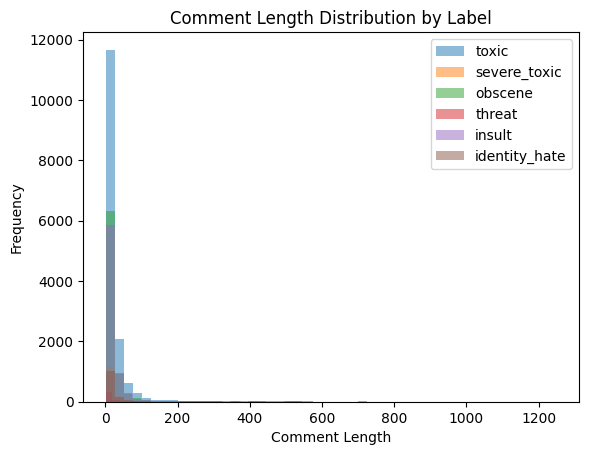

In [10]:
toxic_lengths = df[df['toxic'] == 1]['comment_text'].apply(lambda x: len(x.split()))
severe_toxic_lengths = df[df['severe_toxic'] == 1]['comment_text'].apply(lambda x: len(x.split()))
obscene_lengths = df[df['obscene'] == 1]['comment_text'].apply(lambda x: len(x.split()))
threat_lengths = df[df['threat'] == 1]['comment_text'].apply(lambda x: len(x.split()))
insult_lengths = df[df['insult'] == 1]['comment_text'].apply(lambda x: len(x.split()))
identity_hate_lengths = df[df['identity_hate'] == 1]['comment_text'].apply(lambda x: len(x.split()))
plt.hist(toxic_lengths, bins=50, alpha=0.5, label='toxic')
plt.hist(severe_toxic_lengths, bins=50, alpha=0.5, label='severe_toxic')
plt.hist(obscene_lengths, bins=50, alpha=0.5, label='obscene')
plt.hist(threat_lengths, bins=50, alpha=0.5, label='threat')
plt.hist(insult_lengths, bins=50, alpha=0.5, label='insult')
plt.hist(identity_hate_lengths, bins=50, alpha=0.5, label='identity_hate')
plt.legend(loc='upper right')
plt.title('Comment Length Distribution by Label')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

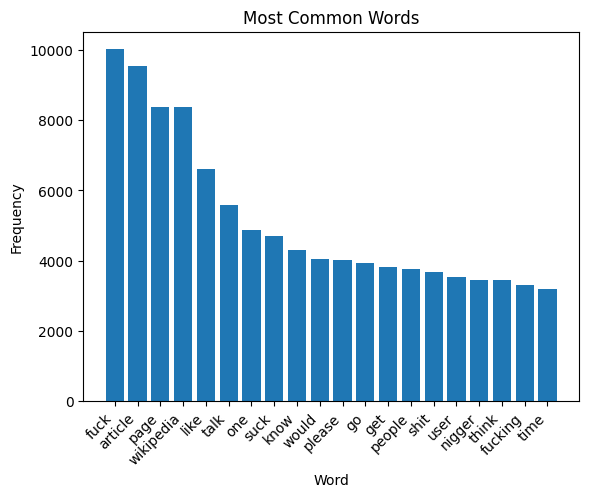

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
vectorizer = CountVectorizer()
text_data = vectorizer.fit_transform(df['comment_text'])
word_counts = text_data.sum(axis=0)
word_freq = [(word, word_counts[0, i]) for word, i in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:20]
plt.bar(range(len(word_freq)), [val[1] for val in word_freq])
plt.xticks(range(len(word_freq)), [val[0] for val in word_freq], rotation=45, ha='right')
plt.title('Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
sia = SentimentIntensityAnalyzer()

In [13]:
toxic_comments = df[df['toxic'] == 1]['comment_text']
pos_sentiments = []
neg_sentiments = []
for comment in toxic_comments:
    sentences = sent_tokenize(comment)
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        pos_sentiments.append(sentiment['pos'])
        neg_sentiments.append(sentiment['neg'])
print("Sentiment Analysis for toxic")
print("Positive sentiment: ", np.mean(pos_sentiments))
print("Negative sentiment: ", np.mean(neg_sentiments))

Sentiment Analysis for toxic
Positive sentiment:  0.12460409310840853
Negative sentiment:  0.3645303386949131


In [14]:
severe_toxic_comments = df[df['severe_toxic'] == 1]['comment_text']
pos_sentiments = []
neg_sentiments = []
for comment in severe_toxic_comments:
    sentences = sent_tokenize(comment)
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        pos_sentiments.append(sentiment['pos'])
        neg_sentiments.append(sentiment['neg'])
print("Sentiment Analysis for severe_toxic")
print("Positive sentiment: ", np.mean(pos_sentiments))
print("Negative sentiment: ", np.mean(neg_sentiments))

Sentiment Analysis for severe_toxic
Positive sentiment:  0.07162257053291536
Negative sentiment:  0.5425416927899687


In [15]:
obscene_comments = df[df['obscene'] == 1]['comment_text']
pos_sentiments = []
neg_sentiments = []
for comment in obscene_comments:
    sentences = sent_tokenize(comment)
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        pos_sentiments.append(sentiment['pos'])
        neg_sentiments.append(sentiment['neg'])
print("Sentiment Analysis for obscene")
print("Positive sentiment: ", np.mean(pos_sentiments))
print("Negative sentiment: ", np.mean(neg_sentiments))

Sentiment Analysis for obscene
Positive sentiment:  0.10907743390552563
Negative sentiment:  0.42961308106753543


In [16]:
threat_comments = df[df['threat'] == 1]['comment_text']
pos_sentiments = []
neg_sentiments = []
for comment in threat_comments:
    sentences = sent_tokenize(comment)
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        pos_sentiments.append(sentiment['pos'])
        neg_sentiments.append(sentiment['neg'])
print("Sentiment Analysis for threat")
print("Positive sentiment: ", np.mean(pos_sentiments))
print("Negative sentiment: ", np.mean(neg_sentiments))

Sentiment Analysis for threat
Positive sentiment:  0.09323608017817372
Negative sentiment:  0.49868374164810686


In [17]:
insult_comments = df[df['insult'] == 1]['comment_text']
pos_sentiments = []
neg_sentiments = []
for comment in insult_comments:
    sentences = sent_tokenize(comment)
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        pos_sentiments.append(sentiment['pos'])
        neg_sentiments.append(sentiment['neg'])
print("Sentiment Analysis for insult")
print("Positive sentiment: ", np.mean(pos_sentiments))
print("Negative sentiment: ", np.mean(neg_sentiments))

Sentiment Analysis for insult
Positive sentiment:  0.1055341170112147
Negative sentiment:  0.43510079718956896


In [18]:
identity_hate_comments = df[df['identity_hate'] == 1]['comment_text']
pos_sentiments = []
neg_sentiments = []
for comment in identity_hate_comments:
    sentences = sent_tokenize(comment)
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        pos_sentiments.append(sentiment['pos'])
        neg_sentiments.append(sentiment['neg'])
print("Sentiment Analysis for identity_hate")
print("Positive sentiment: ", np.mean(pos_sentiments))
print("Negative sentiment: ", np.mean(neg_sentiments))

Sentiment Analysis for identity_hate
Positive sentiment:  0.10276479514415783
Negative sentiment:  0.40754552352048556


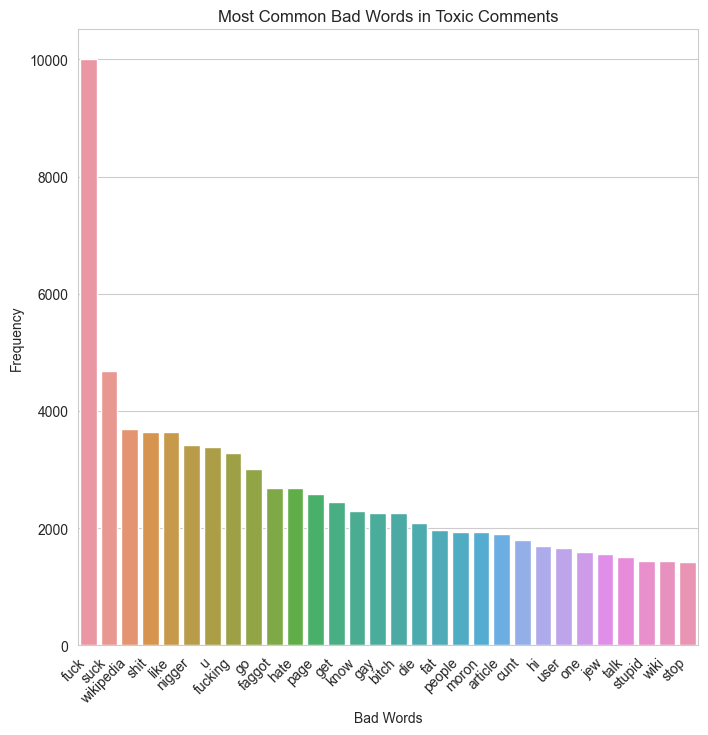

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import seaborn as sns
toxic_comments = df[df['toxic'] == 1]['comment_text'].tolist()
toxic_words = []
for comment in toxic_comments:
    words = comment.split()
    for word in words:
        if word.isalpha() and word not in stop_words:
            toxic_words.append(word.lower())
toxic_word_freq = nltk.FreqDist(toxic_words)
toxic_word_df = pd.DataFrame({'Word': list(toxic_word_freq.keys()), 'Frequency': list(toxic_word_freq.values())})
toxic_word_df = toxic_word_df.sort_values(by='Frequency', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Word', y='Frequency', data=toxic_word_df.head(30))
plt.title('Most Common Bad Words in Toxic Comments')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

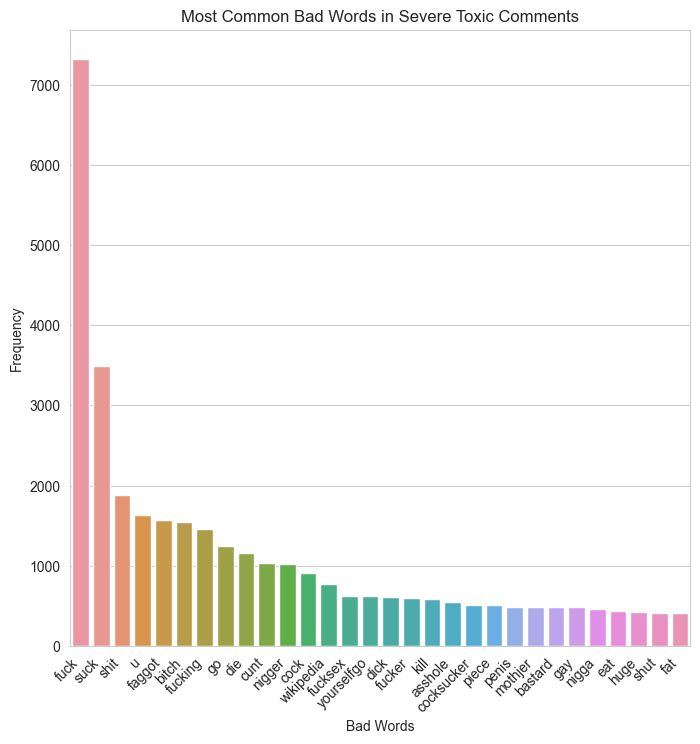

In [26]:
severe_toxic_comments = df[df['severe_toxic'] == 1]['comment_text'].tolist()
severe_toxic_words = []
for comment in severe_toxic_comments:
    words = comment.split()
    for word in words:
        if word.isalpha() and word not in stop_words:
            severe_toxic_words.append(word.lower())
severe_toxic_word_freq = nltk.FreqDist(severe_toxic_words)
severe_toxic_word_df = pd.DataFrame({'Word': list(severe_toxic_word_freq.keys()), 'Frequency': list(severe_toxic_word_freq.values())})
severe_toxic_word_df = severe_toxic_word_df.sort_values(by='Frequency', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Word', y='Frequency', data=severe_toxic_word_df.head(30))
plt.title('Most Common Bad Words in Severe Toxic Comments')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

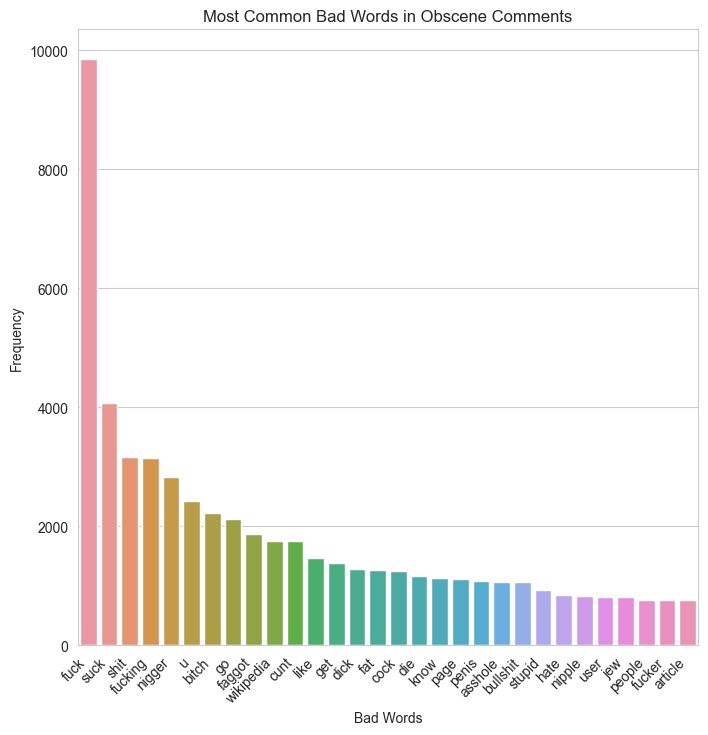

In [27]:
obscene_comments = df[df['obscene'] == 1]['comment_text'].tolist()
obscene_words = []
for comment in obscene_comments:
    words = comment.split()
    for word in words:
        if word.isalpha() and word not in stop_words:
            obscene_words.append(word.lower())
obscene_word_freq = nltk.FreqDist(obscene_words)
obscene_word_df = pd.DataFrame({'Word': list(obscene_word_freq.keys()), 'Frequency': list(obscene_word_freq.values())})
obscene_word_df = obscene_word_df.sort_values(by='Frequency', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Word', y='Frequency', data=obscene_word_df.head(30))
plt.title('Most Common Bad Words in Obscene Comments')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

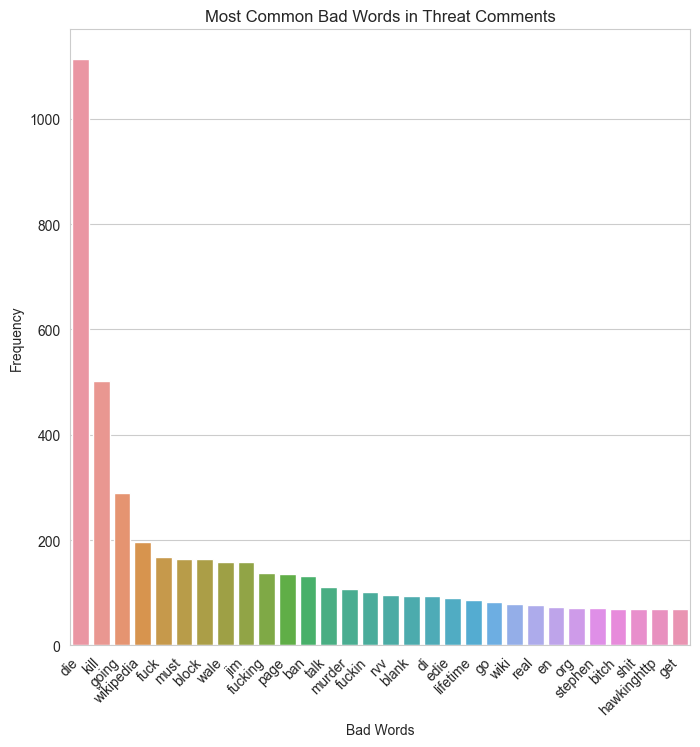

In [28]:
threat_comments = df[df['threat'] == 1]['comment_text'].tolist()
threat_words = []
for comment in threat_comments:
    words = comment.split()
    for word in words:
        if word.isalpha() and word not in stop_words:
            threat_words.append(word.lower())
threat_word_freq = nltk.FreqDist(threat_words)
threat_word_df = pd.DataFrame({'Word': list(threat_word_freq.keys()), 'Frequency': list(threat_word_freq.values())})
threat_word_df = threat_word_df.sort_values(by='Frequency', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Word', y='Frequency', data=threat_word_df.head(30))
plt.title('Most Common Bad Words in Threat Comments')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

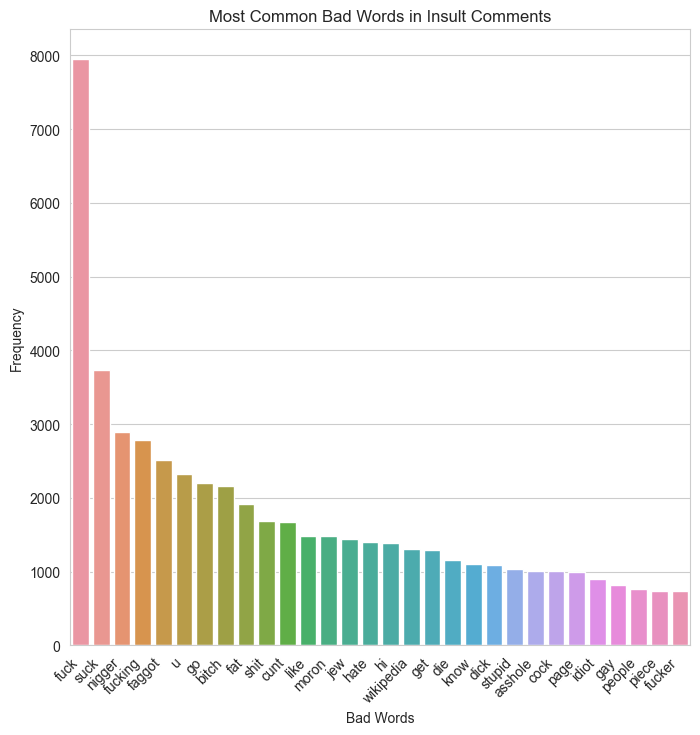

In [29]:
insult_comments = df[df['insult'] == 1]['comment_text'].tolist()
insult_words = []
for comment in insult_comments:
    words = comment.split()
    for word in words:
        if word.isalpha() and word not in stop_words:
            insult_words.append(word.lower())
insult_word_freq = nltk.FreqDist(insult_words)
insult_word_df = pd.DataFrame({'Word': list(insult_word_freq.keys()), 'Frequency': list(insult_word_freq.values())})
insult_word_df = insult_word_df.sort_values(by='Frequency', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Word', y='Frequency', data=insult_word_df.head(30))
plt.title('Most Common Bad Words in Insult Comments')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

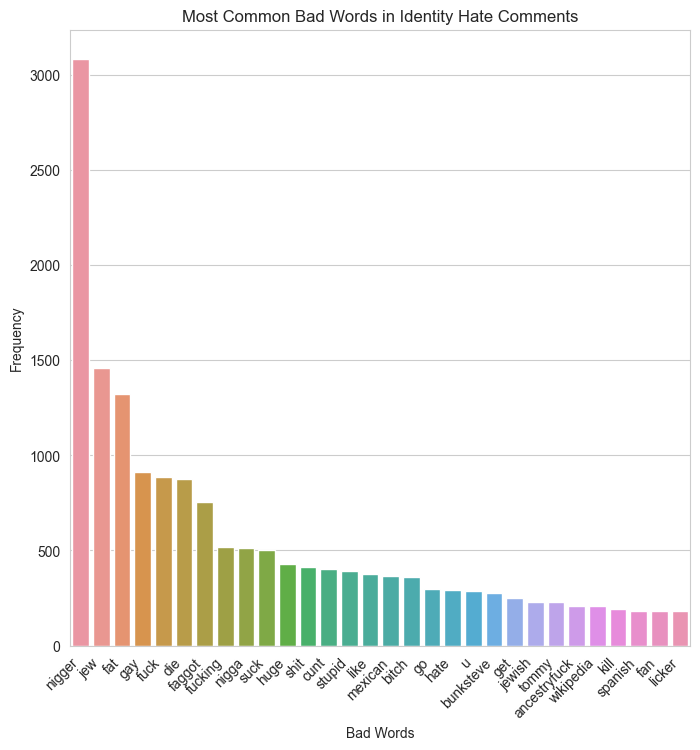

In [30]:
identity_hate_comments = df[df['identity_hate'] == 1]['comment_text'].tolist()
identity_hate_words = []
for comment in identity_hate_comments:
    words = comment.split()
    for word in words:
        if word.isalpha() and word not in stop_words:
            identity_hate_words.append(word.lower())
identity_hate_word_freq = nltk.FreqDist(identity_hate_words)
identity_hate_word_df = pd.DataFrame({'Word': list(identity_hate_word_freq.keys()), 'Frequency': list(identity_hate_word_freq.values())})
identity_hate_word_df = identity_hate_word_df.sort_values(by='Frequency', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Word', y='Frequency', data=identity_hate_word_df.head(30))
plt.title('Most Common Bad Words in Identity Hate Comments')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X = text_data
y = np.array(df.iloc[:, 1:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (24711, 54946)
y_train shape: (24711, 6)
X_test shape: (6178, 54946)
y_test shape: (6178, 6)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
for i in range(6):
    label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'][i]
    y_train_label = y_train[:, i]
    y_test_label = y_test[:, i]
    mnb = MultinomialNB(alpha=0.1)
    mnb.fit(X_train, y_train_label)
    train_acc = mnb.score(X_train, y_train_label)
    test_acc = mnb.score(X_test, y_test_label)
    print(f"Label: {label}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    y_train_pred = mnb.predict(X_train)
    y_test_pred = mnb.predict(X_test)
    print(f"\nTrain Classification Report for label {label}:")
    print(classification_report(y_train_label, y_train_pred))
    print(f"Test Classification Report for label {label}:")
    print(classification_report(y_test_label, y_test_pred))
    print("\n")

Label: toxic
Train Accuracy: 0.9374
Test Accuracy: 0.8804

Train Classification Report for label toxic:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12476
           1       0.94      0.93      0.94     12235

    accuracy                           0.94     24711
   macro avg       0.94      0.94      0.94     24711
weighted avg       0.94      0.94      0.94     24711

Test Classification Report for label toxic:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3119
           1       0.90      0.85      0.88      3059

    accuracy                           0.88      6178
   macro avg       0.88      0.88      0.88      6178
weighted avg       0.88      0.88      0.88      6178



Label: severe_toxic
Train Accuracy: 0.9491
Test Accuracy: 0.9152

Train Classification Report for label severe_toxic:
              precision    recall  f1-score   support

           0       0.99

In [39]:
from sklearn.svm import SVC
for i in range(6):
    label = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'][i]
    y_train_label = y_train[:, i]
    y_test_label = y_test[:, i]
    svm = SVC(C=1, kernel='linear', gamma='scale', decision_function_shape='ovr')
    svm.fit(X_train, y_train_label)
    train_acc = svm.score(X_train, y_train_label)
    test_acc = svm.score(X_test, y_test_label)
    print(f"Label: {label}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    print(f"\nTrain Classification Report for label {label}:")
    print(classification_report(y_train_label, y_train_pred))
    print(f"Test Classification Report for label {label}:")
    print(classification_report(y_test_label, y_test_pred))
    print("\n")

Label: toxic
Train Accuracy: 0.9929
Test Accuracy: 0.8980

Train Classification Report for label toxic:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12476
           1       0.99      0.99      0.99     12235

    accuracy                           0.99     24711
   macro avg       0.99      0.99      0.99     24711
weighted avg       0.99      0.99      0.99     24711

Test Classification Report for label toxic:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3119
           1       0.91      0.88      0.90      3059

    accuracy                           0.90      6178
   macro avg       0.90      0.90      0.90      6178
weighted avg       0.90      0.90      0.90      6178



Label: severe_toxic
Train Accuracy: 0.9836
Test Accuracy: 0.9406

Train Classification Report for label severe_toxic:
              precision    recall  f1-score   support

           0       0.98

In [72]:
import tensorflow
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [73]:
lstm_cnn_model = Sequential()
lstm_cnn_model.add(Embedding(10000, 128, input_length=200))
lstm_cnn_model.add(Conv1D(128, 5, activation='relu'))
lstm_cnn_model.add(MaxPooling1D(5))
lstm_cnn_model.add(Conv1D(128, 5, activation='relu'))
lstm_cnn_model.add(MaxPooling1D(5))
lstm_cnn_model.add(LSTM(128))
lstm_cnn_model.add(Dense(128, activation='relu'))
lstm_cnn_model.add(Dropout(0.5))
lstm_cnn_model.add(Dense(6, activation='sigmoid'))
lstm_cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 conv1d_9 (Conv1D)           (None, 196, 128)          82048     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 39, 128)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 35, 128)           82048     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)             

In [74]:
lstm_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
lstm_cnn_model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels))

Epoch 1/10
194/194 [==============================] - 66s 299ms/step - loss: 0.3327 - accuracy: 0.9218 - val_loss: 0.2166 - val_accuracy: 0.9969
Epoch 2/10
194/194 [==============================] - 58s 301ms/step - loss: 0.2090 - accuracy: 0.9724 - val_loss: 0.2050 - val_accuracy: 0.9969
Epoch 3/10
194/194 [==============================] - 59s 304ms/step - loss: 0.1849 - accuracy: 0.9730 - val_loss: 0.2121 - val_accuracy: 0.9969
Epoch 4/10
194/194 [==============================] - 60s 309ms/step - loss: 0.1654 - accuracy: 0.9806 - val_loss: 0.2218 - val_accuracy: 0.9969
Epoch 5/10
194/194 [==============================] - 61s 313ms/step - loss: 0.1501 - accuracy: 0.9850 - val_loss: 0.2421 - val_accuracy: 0.9969
Epoch 6/10
194/194 [==============================] - 60s 309ms/step - loss: 0.1384 - accuracy: 0.9777 - val_loss: 0.2538 - val_accuracy: 0.9969
Epoch 7/10
194/194 [==============================] - 61s 314ms/step - loss: 0.1300 - accuracy: 0.9880 - val_loss: 0.2769 - val_ac

In [76]:
target_names = ['toxic', 'severe toxic', 'obscene', 'threat', 'insult', 'identity hate']
lstm_cnn_train_pred = lstm_cnn_model.predict(train_data)
lstm_cnn_train_pred = (lstm_cnn_train_pred > 0.5).astype(int)
print(classification_report(train_labels, lstm_cnn_train_pred, target_names=target_names))

773/773 [==============================] - 19s 23ms/step
               precision    recall  f1-score   support

        toxic       0.97      0.99      0.98     12235
 severe toxic       0.68      0.66      0.67      1289
      obscene       0.92      0.89      0.91      6366
       threat       0.00      0.00      0.00       348
       insult       0.76      0.87      0.81      5917
identity hate       0.74      0.03      0.06      1064

    micro avg       0.89      0.87      0.88     27219
    macro avg       0.68      0.57      0.57     27219
 weighted avg       0.88      0.87      0.86     27219
  samples avg       0.46      0.45      0.44     27219



C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
lstm_cnn_val_pred = lstm_cnn_model.predict(val_data)
lstm_cnn_val_pred = (lstm_cnn_val_pred > 0.5).astype(int)
print(classification_report(val_labels, lstm_cnn_val_pred, target_names=target_names))

194/194 [==============================] - 5s 24ms/step
               precision    recall  f1-score   support

        toxic       0.83      0.87      0.85      3059
 severe toxic       0.45      0.41      0.43       306
      obscene       0.81      0.72      0.76      1615
       threat       0.00      0.00      0.00       101
       insult       0.64      0.67      0.65      1484
identity hate       0.57      0.02      0.03       254

    micro avg       0.77      0.72      0.74      6819
    macro avg       0.55      0.45      0.45      6819
 weighted avg       0.75      0.72      0.72      6819
  samples avg       0.38      0.36      0.35      6819



C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
